In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm,binom,geom,poisson,mode
import seaborn as sns

1. Simulate exam scores for 500 students with mean = 70, std dev = 10.

Tasks: Probability of scoring above 80, below 50, between 60–75.

Visuals: Histogram with fitted  curve.


Probability of scoring above 80: 0.19
Probability of scoring below 60: 0.03
Probability of scoring between 65 and 75:0.48


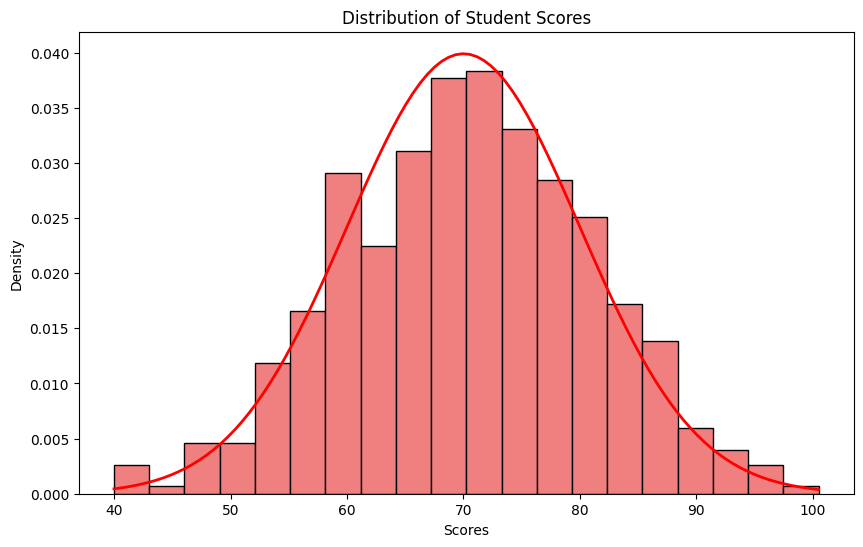

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm


mean = 70
std_dev = 10
total_students = 500

score = np.random.normal(mean, std_dev, total_students)

prob_above_80 = np.mean(score > 80)
prob_below_50 = np.mean(score < 50)
prob_between_60_75 = np.mean((score >= 60) & (score <= 75))

print(f"Probability of scoring above 80: {prob_above_80:.2f}")
print(f"Probability of scoring below 60: {prob_below_50:.2f}")
print(f"Probability of scoring between 65 and 75:{prob_between_60_75:.2f}")



plt.figure(figsize=(10,6))
plt.hist(score, bins=20, density=True, color='lightcoral', edgecolor='black')
x = np.linspace(min(score), max(score), 100)
plt.plot(x, norm.pdf(x, mean, std_dev), 'r', lw=2)
plt.title('Distribution of Student Scores')
plt.xlabel('Scores')
plt.ylabel('Density')
plt.show()


2.Daily Temperature Prediction

Use past temperature data or simulate a data following normal trend

Find probabilities of extreme heat or cold.

Compare mean, median, and mode.
mean_temp = 30
std_temp = 5
days = 365


Probability of extreme heat (> 40°C): 0.025
Probability of extreme cold (< 20°C): 0.022
Mean temperature: 30.07°C
Median temperature: 29.91°C
Mode temperature: 31.90°C


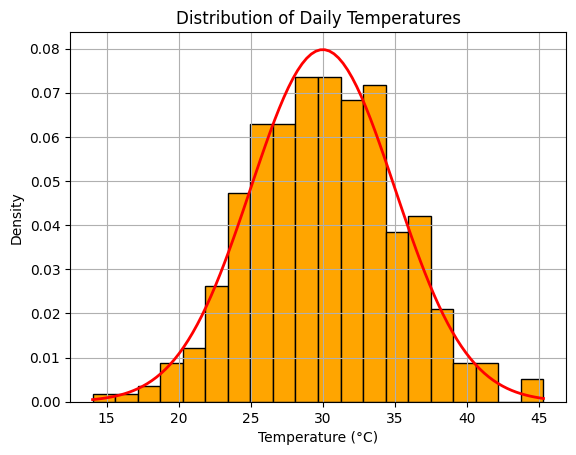

In [14]:
mean_temp = 30
std_temp = 5
days = 365

temps = np.random.normal(mean_temp, std_temp, days)

extreme_heat = 40
extreme_cold = 20

prob_extreme_heat = np.mean(temps > extreme_heat)
prob_extreme_cold = np.mean(temps < extreme_cold)

mean_val = np.mean(temps)
median_val = np.median(temps)
mode_val = float(mode(np.round(temps, 1)).mode)

print(f"Probability of extreme heat (> {extreme_heat}°C): {prob_extreme_heat:.3f}")
print(f"Probability of extreme cold (< {extreme_cold}°C): {prob_extreme_cold:.3f}")
print(f"Mean temperature: {mean_val:.2f}°C")
print(f"Median temperature: {median_val:.2f}°C")
print(f"Mode temperature: {mode_val:.2f}°C")

plt.Figure(figsize=(10,6))
plt.hist(temps,bins=20, density=True, color='orange', edgecolor='black')
x = np.linspace(min(temps), max(temps), 100)
plt.plot(x, norm.pdf(x, mean_temp, std_temp), 'r', lw=2)
plt.title('Distribution of Daily Temperatures')
plt.xlabel('Temperature (°C)')
plt.ylabel('Density')
plt.grid()
plt.show()

3.Customer First Purchase Day

Simulate the day on which a new website visitor makes their first purchase (probability per day = 0.1).

Find probability that a customer buys on Day 1, Day 3, etc.

Visualize with PMF.


Day 1: 0.100
Day 2: 0.090
Day 3: 0.081
Day 4: 0.073
Day 5: 0.066
Day 6: 0.059
Day 7: 0.053
Day 8: 0.048
Day 9: 0.043
Day 10: 0.039
Day 11: 0.035
Day 12: 0.031
Day 13: 0.028
Day 14: 0.025
Day 15: 0.023
Day 16: 0.021
Day 17: 0.019
Day 18: 0.017
Day 19: 0.015
Day 20: 0.014


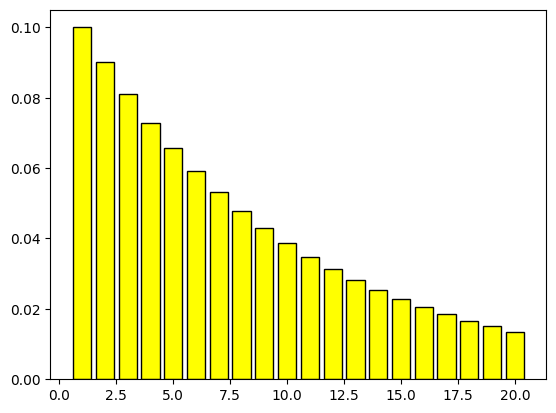

In [16]:
p = 0.1
max_days = 20

pmf_values = geom.pmf(np.arange(1, max_days+1), p)

for day, prob in enumerate(pmf_values, 1):
    print(f"Day {day}: {prob:.3f}")

plt.bar(np.arange(1, max_days+1), pmf_values, color='yellow', edgecolor='black')
plt.show()

4.Basketball Free Throw Attempts

Probability of making a free throw = 0.6.

Find the probability distribution of the number of attempts until the first basket.

Discuss expectation and variance.


Attempt 1: 0.600
Attempt 2: 0.240
Attempt 3: 0.096
Attempt 4: 0.038
Attempt 5: 0.015
Attempt 6: 0.006
Attempt 7: 0.002
Attempt 8: 0.001
Attempt 9: 0.000
Attempt 10: 0.000
Expected attempts: 1.67
Variance: 1.11


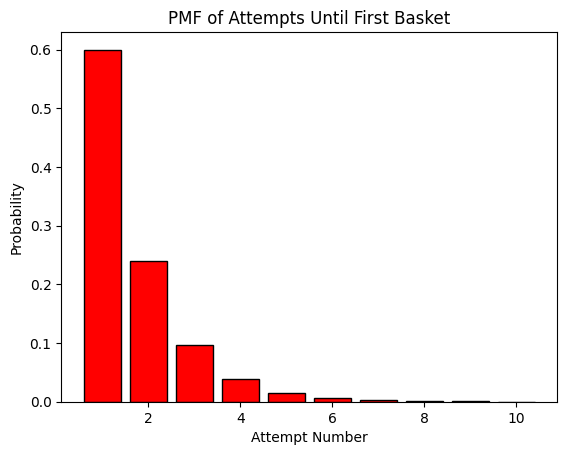

In [17]:
p = 0.6
max_attempts = 10

pmf_values = geom.pmf(np.arange(1, max_attempts+1), p)
expectation = geom.mean(p)
variance = geom.var(p)

for attempt, prob in enumerate(pmf_values, 1):
    print(f"Attempt {attempt}: {prob:.3f}")

print(f"Expected attempts: {expectation:.2f}")
print(f"Variance: {variance:.2f}")

plt.bar(np.arange(1, max_attempts+1), pmf_values, color='Red', edgecolor='black')
plt.title("PMF of Attempts Until First Basket")
plt.xlabel("Attempt Number")
plt.ylabel("Probability")
plt.show()

5.Customer Arrival at a Coffee Shop

Average arrivals = 5 customers/hour.

Find probability of exactly 3, less than 2, more than 8 arrivals.

Plot Poisson PMF and compare with Normal approximation.


Probability of exactly 3 arrivals: 0.1404
Probability of less than 2 arrivals: 0.0404
Probability of more than 8 arrivals: 0.0681


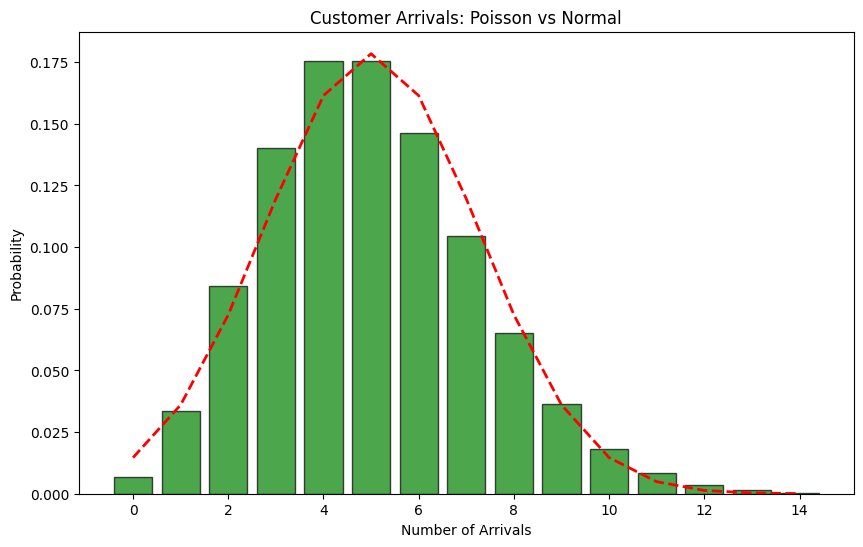

In [20]:
avg_ar = 5


prob_3 = poisson.pmf(3, avg_ar)
prob_lt_2 = poisson.cdf(1, avg_ar)
prob_gt_8 = 1 - poisson.cdf(8, avg_ar)

print(f"Probability of exactly 3 arrivals: {prob_3:.4f}")
print(f"Probability of less than 2 arrivals: {prob_lt_2:.4f}")
print(f"Probability of more than 8 arrivals: {prob_gt_8:.4f}")


x = np.arange(0, 15)
poisson_pmf = poisson.pmf(x, avg_ar)
normal_approx = norm.pdf(x, loc=avg_ar, scale=np.sqrt(avg_ar))

plt.figure(figsize=(10,6))
plt.bar(x, poisson_pmf, color='green', edgecolor='black', alpha=0.7, label='Poisson PMF')
plt.plot(x, normal_approx, 'r--', lw=2, label='Normal Approximation')
plt.title('Customer Arrivals: Poisson vs Normal')
plt.xlabel('Number of Arrivals')
plt.ylabel('Probability')

plt.show()